Missing values per column:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64
Epoch [100/1000], Loss: 133212.8281
Epoch [200/1000], Loss: 29119.7656
Epoch [300/1000], Loss: 15173.4658
Epoch [400/1000], Loss: 13304.9287
Epoch [500/1000], Loss: 13054.5752
Epoch [600/1000], Loss: 13021.0352
Epoch [700/1000], Loss: 13016.5410
Epoch [800/1000], Loss: 13015.9395
Epoch [900/1000], Loss: 13015.8584
Epoch [1000/1000], Loss: 13015.8467


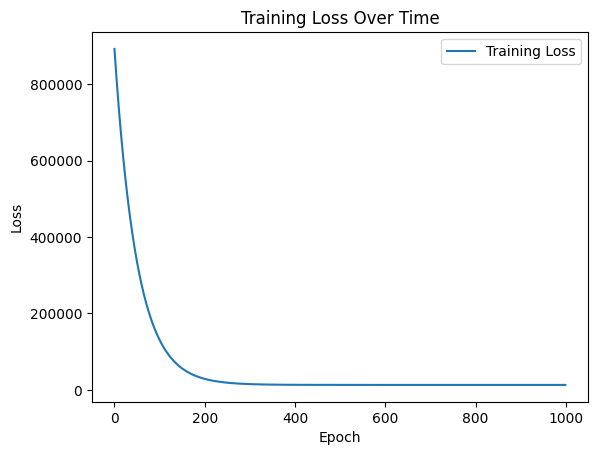

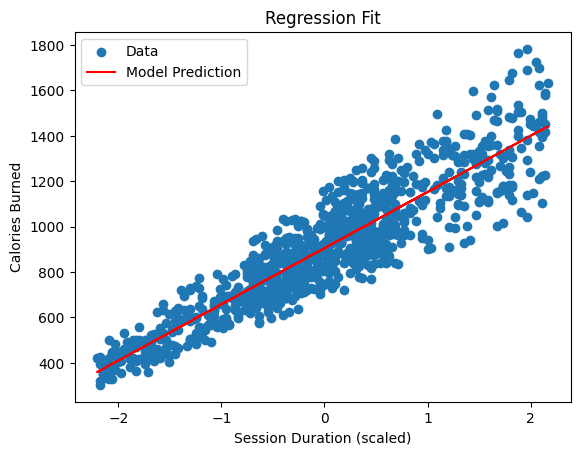

R-squared: 0.8247


In [ ]:
chat# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

# Load data
data_url = "https://raw.githubusercontent.com/sayande01/Kaggle_Notebooks/refs/heads/main/gym_members_exercise_tracking.csv"
data = pd.read_csv(data_url)

# Display basic info
data.head()

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Prepare data for the model
session_duration = data['Session_Duration (hours)'].values.reshape(-1, 1)
calories_burned = data['Calories_Burned'].values.reshape(-1, 1)

# Normalize data
scaler = StandardScaler()
session_duration_scaled = scaler.fit_transform(session_duration)

# Convert to tensors
X_tensor = torch.tensor(session_duration_scaled, dtype=torch.float32)
y_tensor = torch.tensor(calories_burned, dtype=torch.float32)

# Define the model
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = SimpleLinearModel()

# Set loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

# Training loop
losses = []
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_tensor)
    loss = loss_fn(predictions, y_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record loss
    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Plot training loss
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

# Plot predictions
with torch.no_grad():
    plt.scatter(session_duration_scaled, calories_burned, label='Data')
    plt.plot(session_duration_scaled, model(X_tensor).numpy(), color='red', label='Model Prediction')
    plt.xlabel('Session Duration (scaled)')
    plt.ylabel('Calories Burned')
    plt.title('Regression Fit')
    plt.legend()
    plt.show()

# Calculate R-squared
with torch.no_grad():
    total_variance = torch.sum((y_tensor - y_tensor.mean()) ** 2)
    residual_variance = torch.sum((y_tensor - model(X_tensor)) ** 2)
    r2_score = 1 - (residual_variance / total_variance)
    print(f"R-squared: {r2_score.item():.4f}")